# **LOAN APPROVAL PREDICTION**

---



> Predicting loan approval is crucial for financial institutions to assess the risk associated with lending. Accurate predictions can help in making informed decisions, reducing defaults, and ensuring the financial health of the institution.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error, r2_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay

## **Data Loading**

In [2]:
data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


## **Display basic information about the dataset**

In [5]:
print(data.info())
print('----------------------------------------------------------------------')
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
----------

## **Data Cleaning**

In [6]:
# Check for missing values
print(data.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [7]:
#Remove leading/trailing spaces in column names
data.columns = data.columns.str.strip()

In [8]:
# Drop the loan_id column as it's not needed for modeling
data = data.drop(['loan_id'], axis=1)

In [9]:
# Checking for duplicate values
print(data.duplicated().sum())

0


## **Visualization**

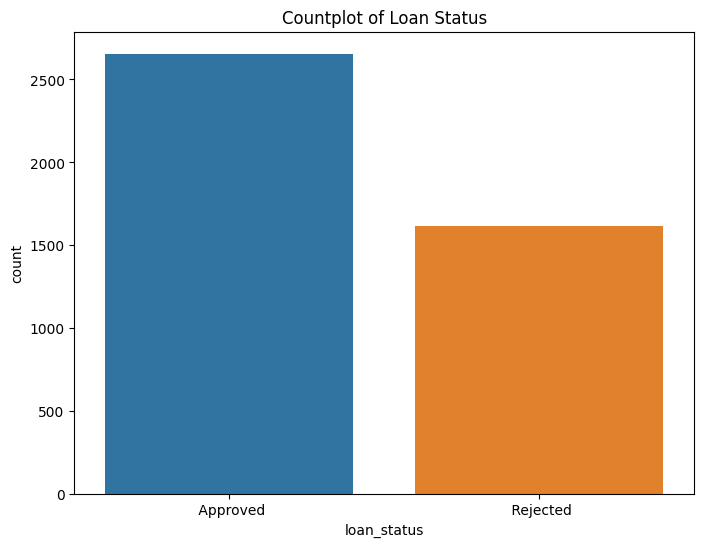

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data,x='loan_status', hue="loan_status")
plt.title("Countplot of Loan Status")
plt.show()

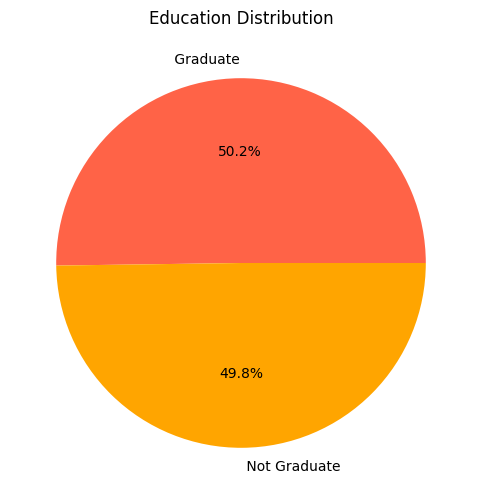

In [11]:
education_counts = data['education'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['tomato', 'orange'])
plt.title('Education Distribution')
plt.show()

Text(0.5, 1.0, 'Number of Dependents')

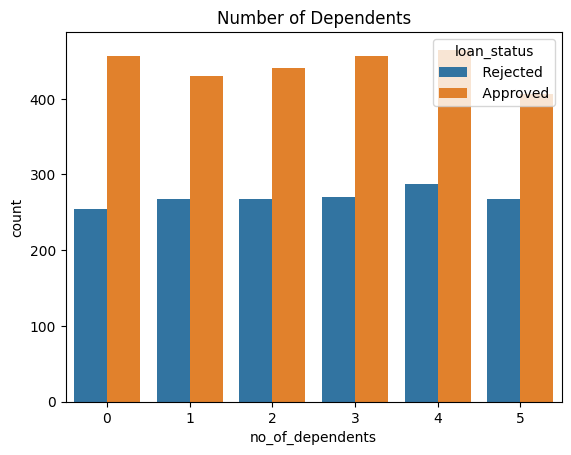

In [12]:
sns.countplot(x = 'no_of_dependents', data = data,hue='loan_status').set_title('Number of Dependents')

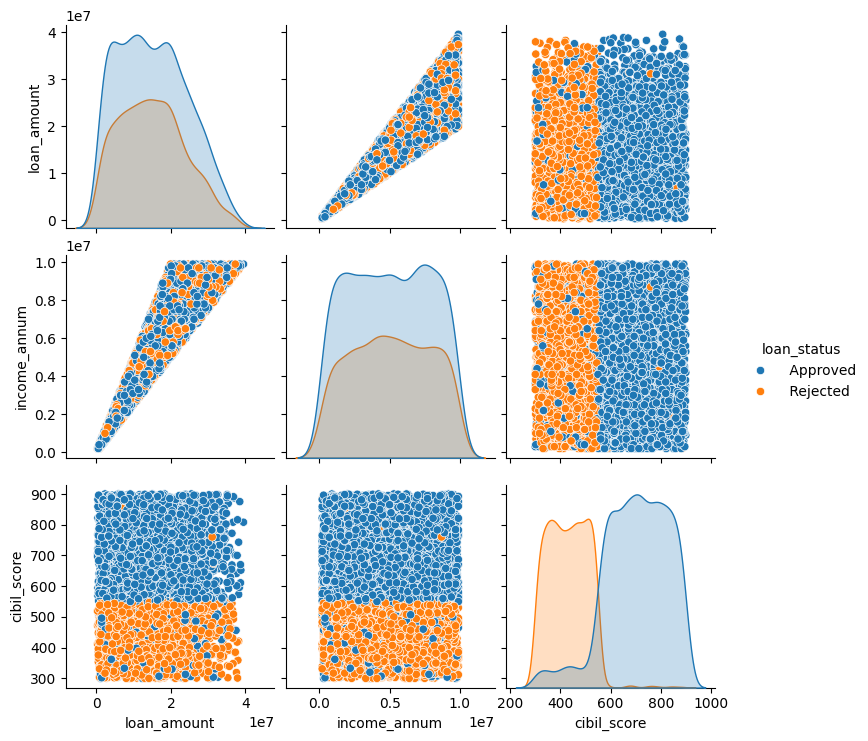

In [13]:
subset1=data[['loan_status','loan_amount','income_annum','cibil_score']]
sns.pairplot(subset1, hue='loan_status')

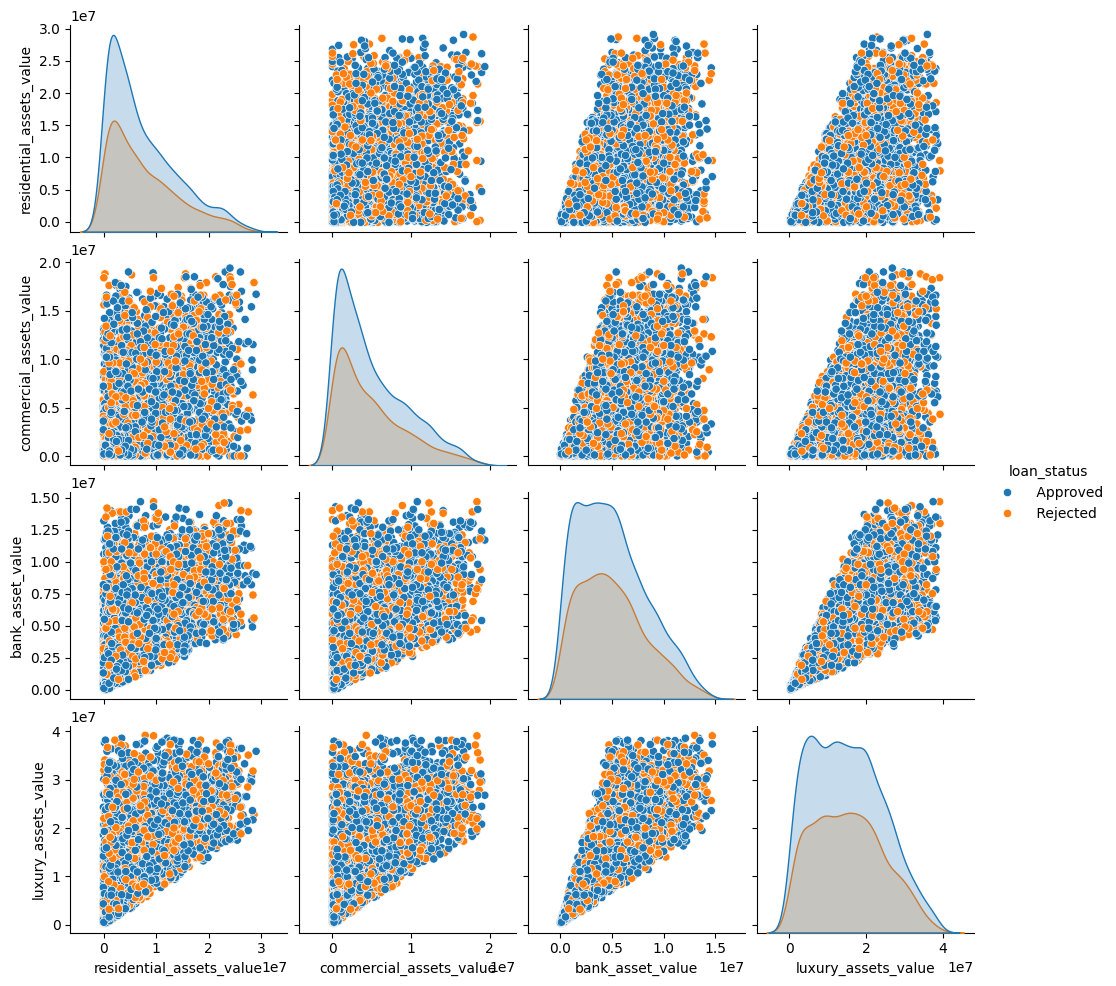

In [14]:
subset2=data[['loan_status','residential_assets_value','commercial_assets_value','bank_asset_value','luxury_assets_value']]
sns.pairplot(subset2, hue='loan_status')

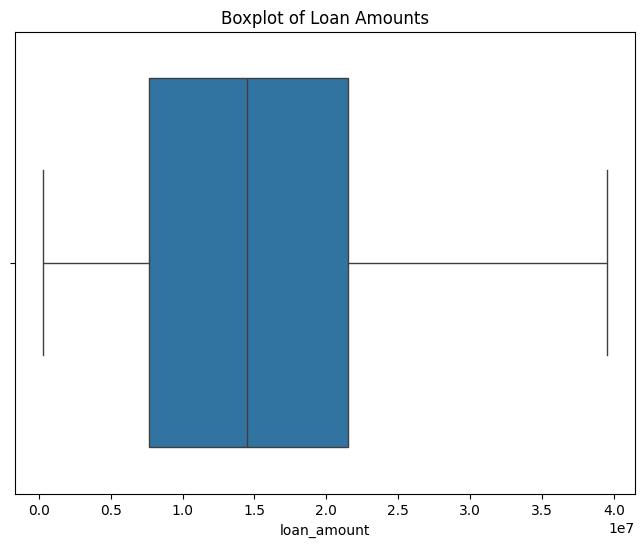

In [15]:
# Data visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="loan_amount")
plt.title("Boxplot of Loan Amounts")
plt.show()

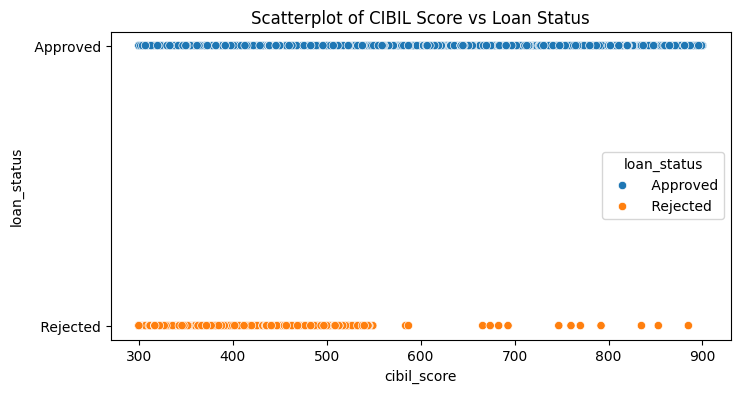

In [16]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='cibil_score', y='loan_status', data=data,hue='loan_status')
plt.title("Scatterplot of CIBIL Score vs Loan Status")
plt.show()

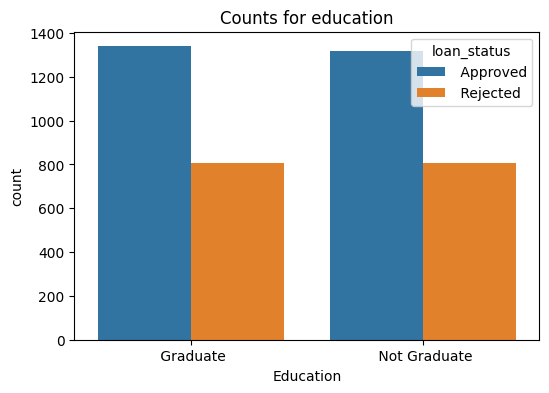

In [17]:
plt.figure(figsize = (6,4))
sns.countplot(data, x='education', hue='loan_status')
plt.xlabel("Education")
plt.title("Counts for education")

plt.show()

In [18]:
# Encode categorical variables
le = LabelEncoder()
# data['loan_status'] = le.fit_transform(data['loan_status'])
data['self_employed'] = le.fit_transform(data['self_employed'])
data['education'] = le.fit_transform(data['education'])

C:\Users\User\AppData\Local\Temp\ipykernel_18648\1654050073.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  val.set_xticklabels(val.get_xticklabels(),rotation=90,ha="right")


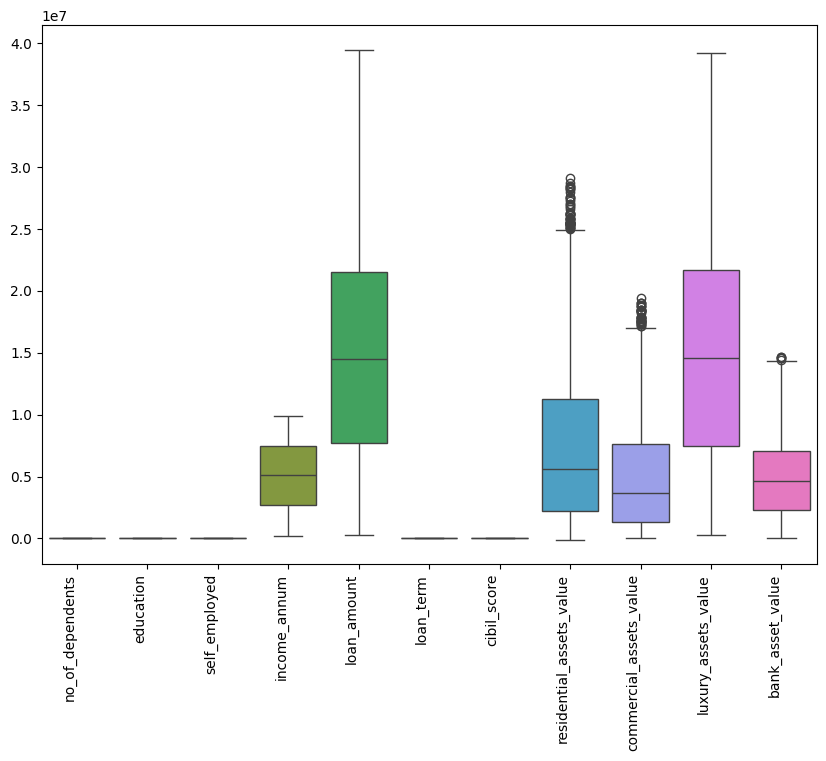

In [19]:
plt.figure(figsize=(10, 7))
val=sns.boxplot(data=data.drop(columns=['loan_status']))
val.set_xticklabels(val.get_xticklabels(),rotation=90,ha="right")
plt.show()

#### **Treating outliears**

In [20]:
def detect_outliers_iqr(data, column):
       Q1 = data[column].quantile(0.25)
       Q3 = data[column].quantile(0.75)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       upper_bound = Q3 + 1.5 * IQR
       return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
def treat_outliers_iqr(data, column):
       Q1 = data[column].quantile(0.25)
       Q3 = data[column].quantile(0.75)
       IQR = Q3 - Q1
       lower_bound = Q1 - 1.5 * IQR
       upper_bound = Q3 + 1.5 * IQR
       data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
       data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
       return data
def detect_outliers_zscore(data, column, threshold=3):
       mean = data[column].mean()
       std = data[column].std()
       z_scores = (data[column] - mean) / std
       return data[np.abs(z_scores) > threshold]

def treat_outliers_zscore(data, column, threshold=3):
       mean = data[column].mean()
       std = data[column].std()
       z_scores = (data[column] - mean) / std
       data[column] = np.where(np.abs(z_scores) > threshold, np.sign(z_scores) * threshold * std + mean, data[column])
       return data


In [21]:
columns = ['residential_assets_value', 'commercial_assets_value', 'bank_asset_value']
for col in columns:
       outliers = detect_outliers_iqr(data, col)
       outliers = detect_outliers_zscore(data, col)

In [22]:
for col in columns:
       data = treat_outliers_iqr(data, col)

C:\Users\User\AppData\Local\Temp\ipykernel_18648\128336634.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  val.set_xticklabels(val.get_xticklabels(),rotation=90,ha="right")


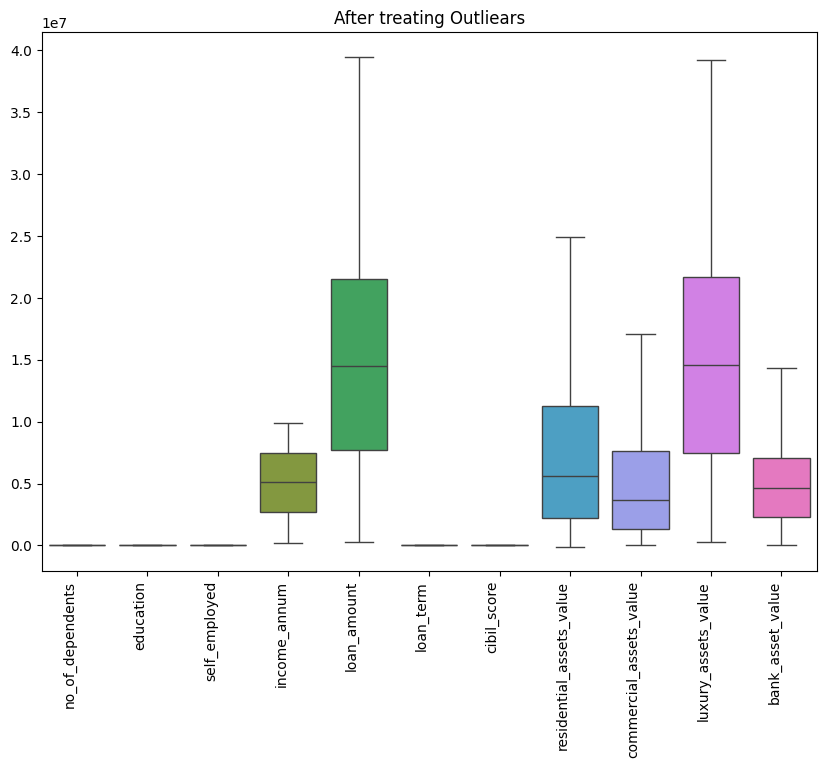

In [23]:
plt.figure(figsize=(10, 7))
val=sns.boxplot(data=data.drop(columns=['loan_status']))
val.set_xticklabels(val.get_xticklabels(),rotation=90,ha="right")
plt.title("After treating Outliears")
plt.show()

### **Handling imbalanced Data / Resampling the data**

In [24]:
data['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [25]:
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data['loan_status'])

In [26]:
#create two different dataframe of loan approved and lopan rejected 
loan_approved = data[(data['loan_status']==0)] 
loan_rejected = data[(data['loan_status']==1)] 

# upsample loan approved
loan_rejected_upsampled = resample(loan_rejected, replace=True,n_samples=len(loan_approved),random_state=42)

# Combine loan rejected with downsampled loan approved
data_upsampled = pd.concat([loan_rejected_upsampled, loan_approved])


In [27]:
data_upsampled['loan_status'].value_counts()

loan_status
1    2656
0    2656
Name: count, dtype: int64

By using resampling technique imbalnced data is handled and both approved and rejected is now equal to 2656


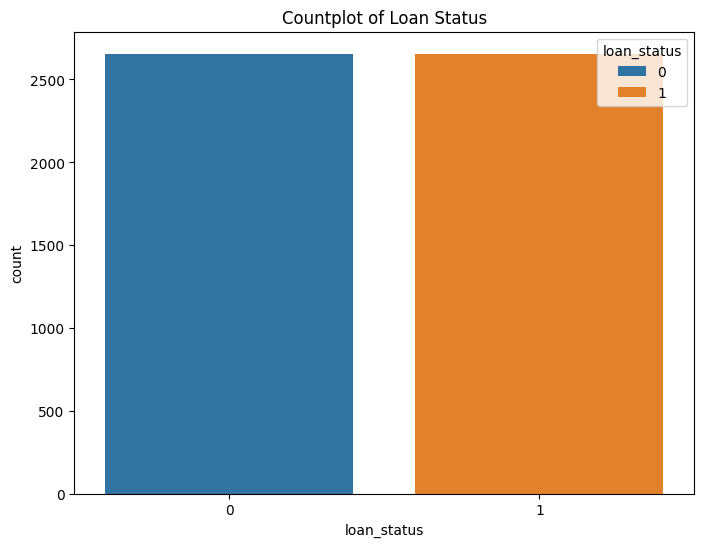

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_upsampled, x="loan_status",hue='loan_status')
plt.title("Countplot of Loan Status")
plt.show()

0 describes No.of Approved Loans and 1 describes No.of Rejected Loans

In [29]:
data_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5312 entries, 2974 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          5312 non-null   int64  
 1   education                 5312 non-null   int64  
 2   self_employed             5312 non-null   int64  
 3   income_annum              5312 non-null   int64  
 4   loan_amount               5312 non-null   int64  
 5   loan_term                 5312 non-null   int64  
 6   cibil_score               5312 non-null   int64  
 7   residential_assets_value  5312 non-null   float64
 8   commercial_assets_value   5312 non-null   float64
 9   luxury_assets_value       5312 non-null   int64  
 10  bank_asset_value          5312 non-null   float64
 11  loan_status               5312 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 539.5 KB


loan_status                 1.000000
loan_term                   0.114738
residential_assets_value    0.027242
no_of_dependents            0.027162
luxury_assets_value         0.025916
income_annum                0.024010
bank_asset_value            0.015041
self_employed              -0.003765
loan_amount                -0.007998
commercial_assets_value    -0.011577
education                  -0.021847
cibil_score                -0.795891
Name: loan_status, dtype: float64


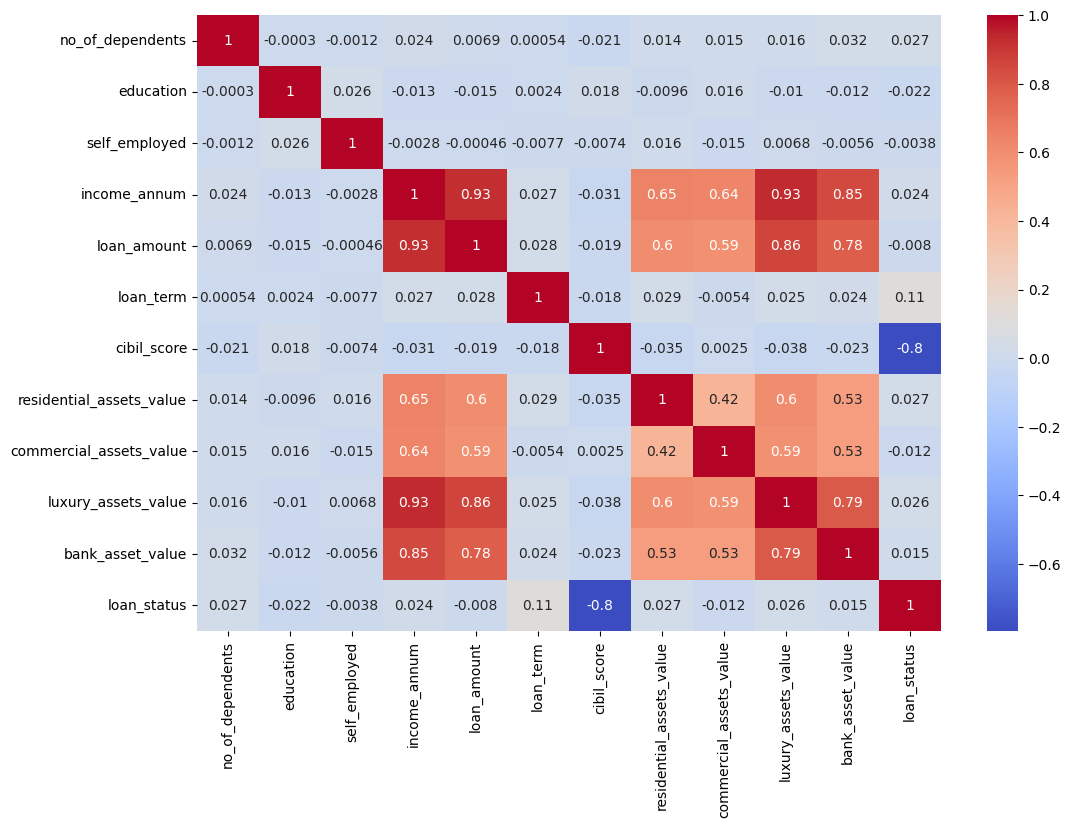

In [30]:
# Encode categorical variables
le = LabelEncoder()
# data_upsampled['loan_status'] = le.fit_transform(data_downsampled['loan_status'])
data_upsampled['self_employed'] = le.fit_transform(data_upsampled['self_employed'])
data_upsampled['education'] = le.fit_transform(data_upsampled['education'])



#Calculate the correlation matrix
correlation_matrix=data_upsampled.corr()

#print the correlation with the target variable
print(correlation_matrix['loan_status'].sort_values(ascending=False))

#Visualize the correlation martix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

## **Feature Importance and Selection**

                                           Feature  Correlation (%)
cibil_score                            cibil_score        79.589132
loan_term                                loan_term        11.473803
residential_assets_value  residential_assets_value         2.724162
no_of_dependents                  no_of_dependents         2.716172
luxury_assets_value            luxury_assets_value         2.591601
income_annum                          income_annum         2.401000
education                                education         2.184726
bank_asset_value                  bank_asset_value         1.504135
commercial_assets_value    commercial_assets_value         1.157733
loan_amount                            loan_amount         0.799767
self_employed                        self_employed         0.376509


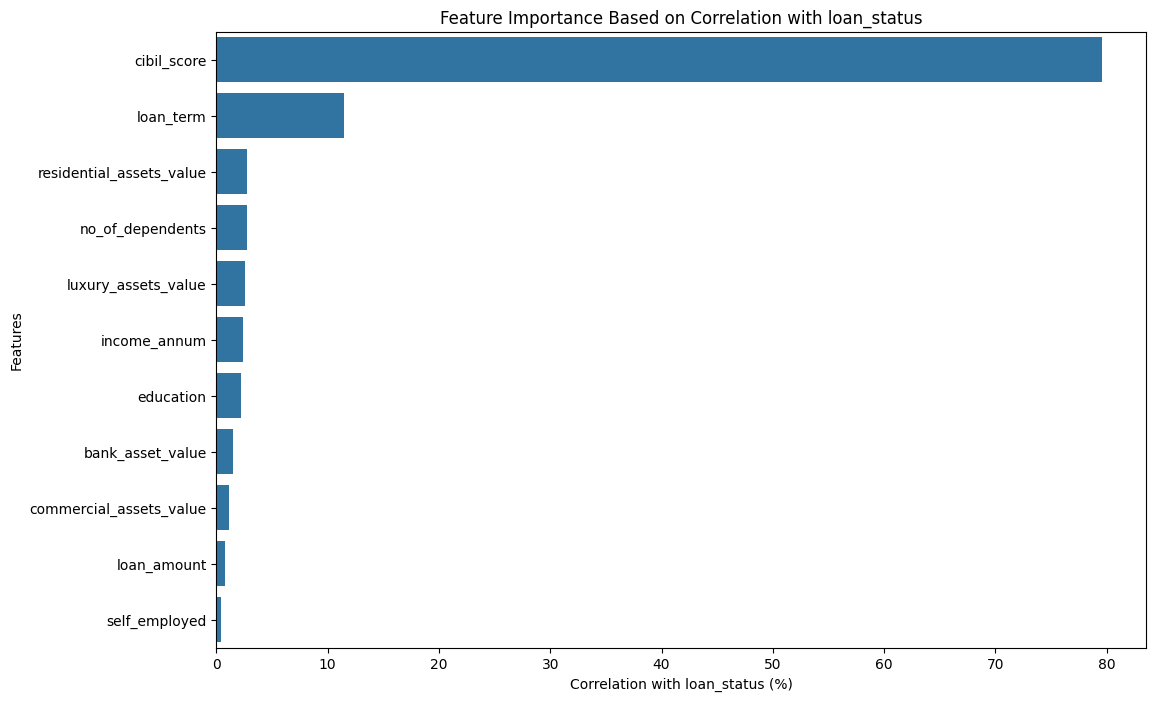

In [31]:
# Get the absolute values of the correlation with the target variable
correlation_with_target = correlation_matrix['loan_status'].abs()

# Convert to percentages
correlation_with_target_percentage = correlation_with_target * 100

# Create a DataFrame for the result
correlation_df = pd.DataFrame({
    'Feature': correlation_with_target.index,
    'Correlation (%)': correlation_with_target_percentage
}).sort_values(by='Correlation (%)', ascending=False)


# Drop the target variable itself from the DataFrame
correlation_df = correlation_df[correlation_df['Feature'] != 'loan_status']
print(correlation_df)

# Plot the results in a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation (%)', y='Feature', data=correlation_df)
plt.title('Feature Importance Based on Correlation with loan_status')
plt.xlabel('Correlation with loan_status (%)')
plt.ylabel('Features')
plt.show()


In [32]:
# Drop the self_employed as it's not needed for modeling, importances for these is very less for modelling
data = data_upsampled.drop(['self_employed'], axis=1)

In [33]:
data_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5312 entries, 2974 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          5312 non-null   int64  
 1   education                 5312 non-null   int64  
 2   self_employed             5312 non-null   int64  
 3   income_annum              5312 non-null   int64  
 4   loan_amount               5312 non-null   int64  
 5   loan_term                 5312 non-null   int64  
 6   cibil_score               5312 non-null   int64  
 7   residential_assets_value  5312 non-null   float64
 8   commercial_assets_value   5312 non-null   float64
 9   luxury_assets_value       5312 non-null   int64  
 10  bank_asset_value          5312 non-null   float64
 11  loan_status               5312 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 539.5 KB


### **Scaling**

In [34]:
x = data_upsampled.drop([ 'loan_status'], axis=1)
y = data_upsampled['loan_status']
column_names = x.columns.tolist()

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=column_names)
x_scaled

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1.0,0.0,0.0,0.752577,0.395408,0.888889,0.263333,0.315369,0.381232,0.568123,0.587413
1,0.2,0.0,1.0,0.329897,0.306122,0.333333,0.371667,0.247505,0.275660,0.205656,0.181818
2,0.4,1.0,0.0,0.402062,0.405612,0.222222,0.410000,0.143713,0.181818,0.380463,0.258741
3,0.2,0.0,1.0,0.680412,0.441327,0.666667,0.073333,0.223553,0.328446,0.457584,0.538462
4,1.0,0.0,0.0,0.443299,0.423469,0.888889,0.258333,0.111776,0.146628,0.267352,0.391608
...,...,...,...,...,...,...,...,...,...,...,...
5307,0.6,0.0,1.0,0.288660,0.183673,0.222222,0.968333,0.059880,0.263930,0.149100,0.160839
5308,0.6,0.0,0.0,0.494845,0.316327,0.666667,0.941667,0.191617,0.475073,0.493573,0.440559
5309,0.0,1.0,1.0,0.319588,0.280612,1.000000,0.431667,0.171657,0.170088,0.275064,0.132867
5310,0.2,1.0,0.0,0.402062,0.318878,0.333333,0.800000,0.331337,0.041056,0.354756,0.405594


## **Data preparation and split**

In [35]:
# Split the data into features and target variable
X = x_scaled
y = data_upsampled["loan_status"]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## **Model Building**


*   Logistic Regression
*   Decision Tree
*   Random Forest
*   Support Vector Machine (SVM)
*   Gradient Boosting Classifier


### **Logistic Regression**

Accuracy:  92.293
Precision: 0.897
Recall: 0.960
F1 Score: 0.927


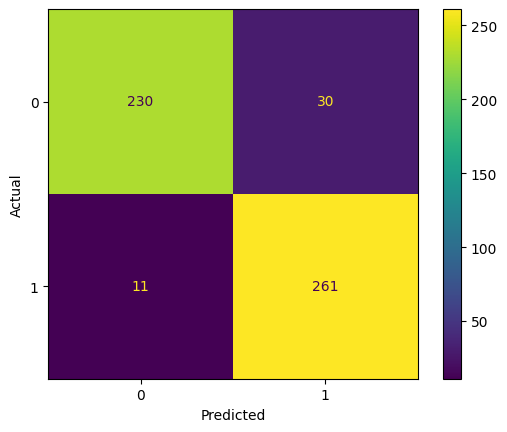

In [36]:
reg = LogisticRegression()
reg.fit(x_train, y_train)
regpred = reg.predict(x_test)

print("Accuracy: ", round(accuracy_score(y_test, regpred) * 100,3))
print('Precision:', '%.3f' % precision_score(y_test, regpred))
print('Recall:', '%.3f' % recall_score(y_test, regpred))
print('F1 Score:', '%.3f' % f1_score(y_test, regpred))

ConfusionMatrixDisplay.from_predictions(y_test, regpred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

0 Indicates Approved and 1 indicates Rejected

### **Decision Tree**

Accuracy:  99.06
Precision: 0.982
Recall: 1.000
F1 Score: 0.991


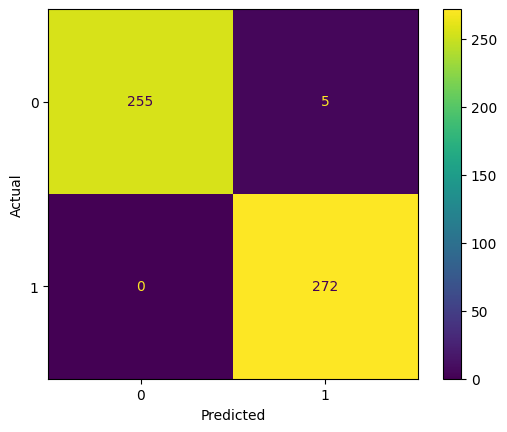

In [37]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
dtreepred = dtree.predict(x_test)

print("Accuracy: ", round(accuracy_score(y_test, dtreepred) * 100,3))
print('Precision:', '%.3f' % precision_score(y_test, dtreepred))
print('Recall:', '%.3f' % recall_score(y_test, dtreepred))
print('F1 Score:', '%.3f' % f1_score(y_test, dtreepred))

ConfusionMatrixDisplay.from_predictions(y_test, dtreepred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

0 Indicates Approved and 1 indicates Rejected

### **Random Forest**

Accuracy:  99.06
Precision: 0.985
Recall: 0.996
F1 Score: 0.991


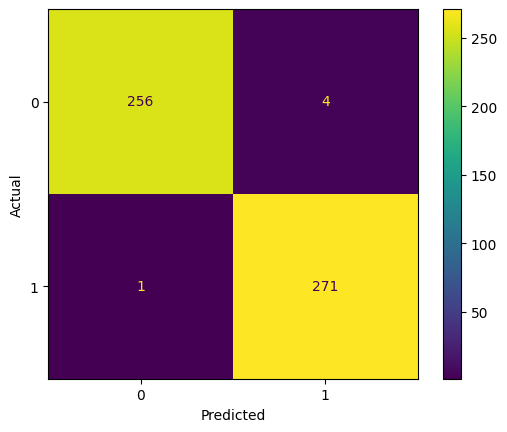

In [38]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
rfpred = rf.predict(x_test)

print("Accuracy: ", round(accuracy_score(y_test, rfpred) * 100,3))
print('Precision:', '%.3f' % precision_score(y_test, rfpred))
print('Recall:', '%.3f' % recall_score(y_test, rfpred))
print('F1 Score:', '%.3f' % f1_score(y_test, rfpred))

ConfusionMatrixDisplay.from_predictions(y_test, rfpred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

0 Indicates Approved and 1 indicates Rejected

### **Support Vector Machine (SVM)**

Accuracy:  93.609
Precision: 0.902
Recall: 0.982
F1 Score: 0.940


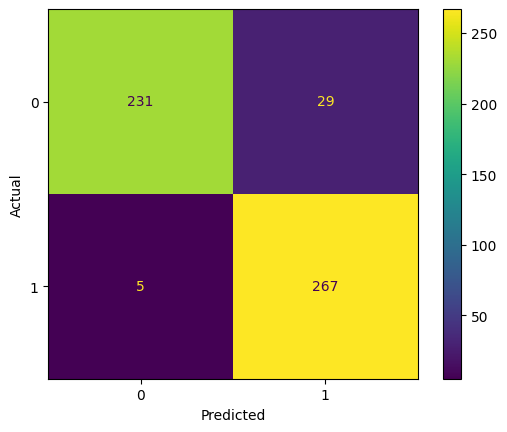

In [39]:
svm = SVC()
svm.fit(x_train, y_train)
svmpred = svm.predict(x_test)

print("Accuracy: ", round(accuracy_score(y_test, svmpred) * 100,3))
print('Precision:', '%.3f' % precision_score(y_test, svmpred))
print('Recall:', '%.3f' % recall_score(y_test, svmpred))
print('F1 Score:', '%.3f' % f1_score(y_test, svmpred))

ConfusionMatrixDisplay.from_predictions(y_test, svmpred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

0 Indicates Approved and 1 indicates Rejected

### **Gradient Boosting Classifier**

Accuracy:  98.872
Precision: 0.982
Recall: 0.996
F1 Score: 0.989


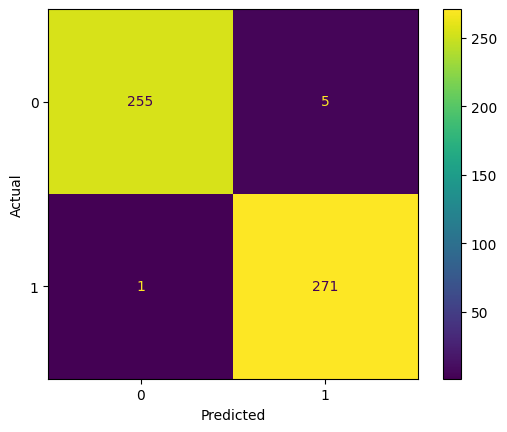

In [40]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gbpred = gb.predict(x_test)

print("Accuracy: ", round(accuracy_score(y_test, gbpred) * 100,3))
print('Precision:', '%.3f' % precision_score(y_test, gbpred))
print('Recall:', '%.3f' % recall_score(y_test, gbpred))
print('F1 Score:', '%.3f' % f1_score(y_test, gbpred))

ConfusionMatrixDisplay.from_predictions(y_test, gbpred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

0 Indicates Approved and 1 indicates Rejected

## **Model evaluation**

In [41]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}:")
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score: ", r2_score(y_test, y_pred))

evaluate_model("Logistic Regression", y_test, regpred)
evaluate_model("Decision Tree", y_test, dtreepred)
evaluate_model("Random Forest", y_test, rfpred)
evaluate_model("Support Vector Machine (SVM)", y_test, svmpred)
evaluate_model("Gradient Boosting Classifier", y_test, gbpred)



Logistic Regression:
Accuracy:  92.29323308270678
Mean Absolute Error:  0.07706766917293233
Mean Squared Error:  0.07706766917293233
Root Mean Squared Error:  0.27761064311897754
R2 Score:  0.6915723981900452

Decision Tree:
Accuracy:  99.06015037593986
Mean Absolute Error:  0.009398496240601503
Mean Squared Error:  0.009398496240601503
Root Mean Squared Error:  0.09694584179118516
R2 Score:  0.9623868778280543

Random Forest:
Accuracy:  99.06015037593986
Mean Absolute Error:  0.009398496240601503
Mean Squared Error:  0.009398496240601503
Root Mean Squared Error:  0.09694584179118516
R2 Score:  0.9623868778280543

Support Vector Machine (SVM):
Accuracy:  93.60902255639097
Mean Absolute Error:  0.06390977443609022
Mean Squared Error:  0.06390977443609022
Root Mean Squared Error:  0.2528038259917959
R2 Score:  0.7442307692307693

Gradient Boosting Classifier:
Accuracy:  98.87218045112782
Mean Absolute Error:  0.011278195488721804
Mean Squared Error:  0.011278195488721804
Root Mean Squar

## **Model Performance Comparison**

In [42]:
LR = accuracy_score(y_test, regpred) 
DT = accuracy_score(y_test, dtreepred) 
RF = accuracy_score(y_test, rfpred) 
SVM = accuracy_score(y_test, svmpred) 
GB = accuracy_score(y_test, gbpred) 

LR_R2 =  r2_score(y_test, regpred) 
DT_R2 =  r2_score(y_test, dtreepred) 
RF_R2 =  r2_score(y_test, rfpred) 
SVM_R2 =  r2_score(y_test, svmpred) 
GB_R2 =  r2_score(y_test, gbpred) 

model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'],
    'Accuracy': [LR, DT, RF, SVM, GB],
    'R2_score ' : [LR_R2, DT_R2, RF_R2, SVM_R2, GB_R2]
})

print("\nModel Performance Comparison:")
print(model_performance)


Model Performance Comparison:
                 Model  Accuracy  R2_score 
0  Logistic Regression  0.922932   0.691572
1        Decision Tree  0.990602   0.962387
2        Random Forest  0.990602   0.962387
3                  SVM  0.936090   0.744231
4    Gradient Boosting  0.988722   0.954864


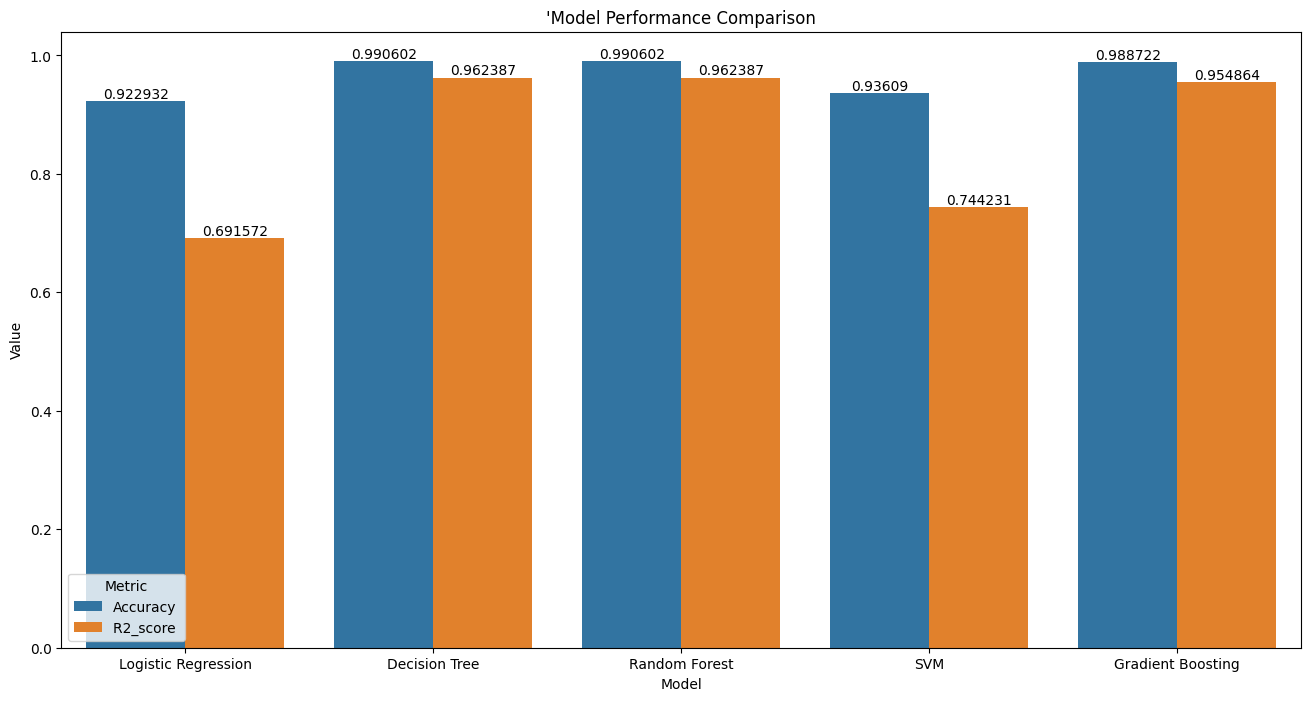

In [45]:
model_performance_melt=model_performance.melt(id_vars='Model',value_vars=['Accuracy','R2_score '],var_name='Metric',value_name="Value")

plt.figure(figsize = (16,8))
axs=sns.barplot(data=model_performance_melt,x='Model',y='Value',hue='Metric')
plt.xlabel("Model")
plt.title("'Model Performance Comparison")


for i in axs.containers:
    axs.bar_label(i,)

plt.show()

# **Conclusion**
---


* The loan approval prediction project successfully analyzed the dataset and built five machine learning models to predict whether a loan application will be approved or rejected.

* The models evaluated include Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and Gradient Boosting Classifier.

* The feature importance analysis revealed that the **CIBIL score** is the most influential factor in predicting loan approval, followed by loan term, asset values,etc..


* Each model's performance was assessed using various evaluation metrics, including accuracy, mean absolute error, mean squared error, root mean squared error, and R2 score.

* Based on the evaluation results, the **Decision Tree model** demonstrated the **Highest Accuracy of 99.43%**  and **Highest R2 Score of 0.977** in predicting loan approval outcomes.

